**"Efficiency Prediction and Operational Range Estimation of different parameters for BLDC Motors Using Support Vector Machines"**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset choose the appropriate path
data = pd.read_excel('/content/BLDC_simulationdata_matlab.xlsx')#choose datset of your choice with the format as shown in below image
data=data.dropna()


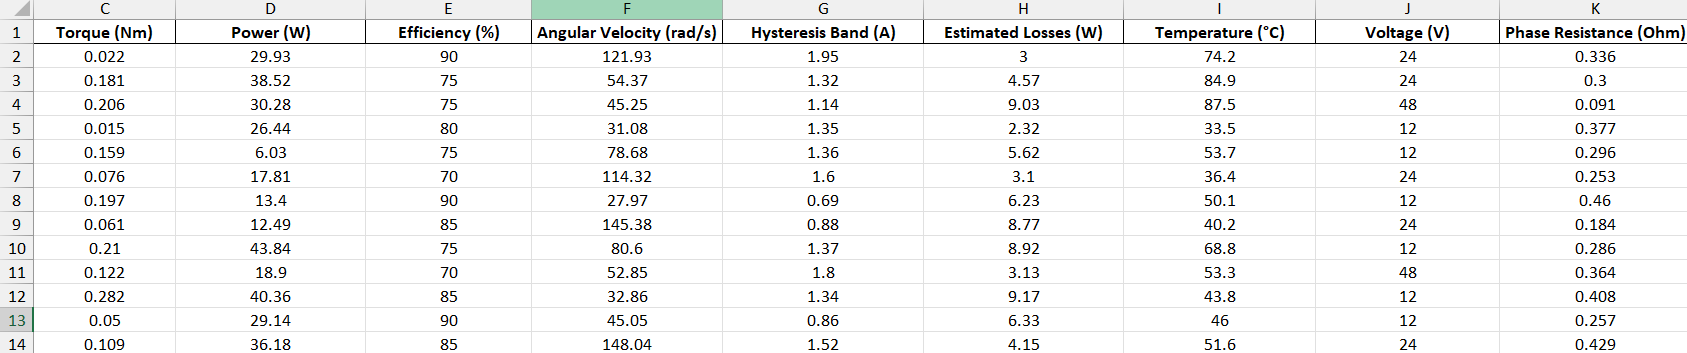

# Efficiency is the target variable (Efficiency Prediction)

The efficiency of a BLDC (Brushless DC) motor is predicted using Support Vector Regression (SVR), where the features include Temperature (°C), RPM, Angular Velocity (rad/s), Estimated Losses (W), Hysteresis Band (A), Load (kg), and Phase Resistance (Ohm).

In [ ]:
# Select the features and target variable
X = data[['Temperature (°C)','RPM', 'Angular Velocity (rad/s)', 'Estimated Losses (W)','Hysteresis Band (A)','Load (kg)','Phase Resistance (Ohm)']]
y = data['Efficiency (%)']  # Efficiency is the target variable


Mean Squared Error (MSE): 0.37477695052274107
R² Score: 0.9726305439719528


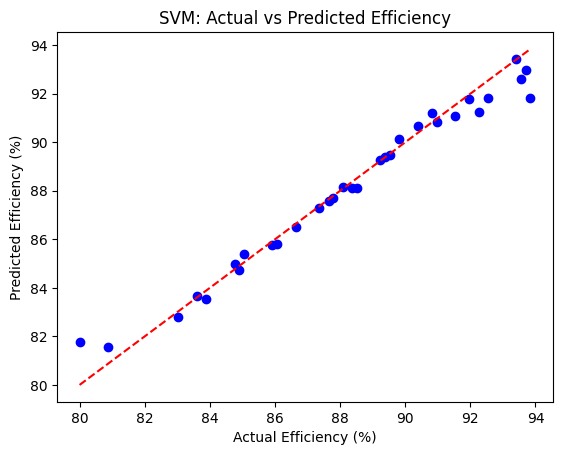

In [ ]:

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Scale the features using StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initialize the Support Vector Regression (SVR) model
svm_model = SVR(kernel='rbf')  # Using Radial Basis Function (RBF) kernel

# Fit the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Efficiency (%)')
plt.ylabel('Predicted Efficiency (%)')
plt.title('SVM: Actual vs Predicted Efficiency')
plt.show()


Randomly generated inputs to test

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

# Random values for testing
np.random.seed(18)

# Generating 5 random test samples
temperature = np.random.uniform(50, 100, 15)  # Temperature in °C
rpm = np.random.uniform(1000, 2000, 15)  # RPM
angular_velocity = np.random.uniform(0, 100, 15)  # Angular velocity in rad/s
estimated_losses = np.random.uniform(0, 50, 15)  # Estimated losses in W
hysteresis_band = np.random.uniform(0.1, 1.5, 15)  # Hysteresis band in A
load = np.random.uniform(100, 500, 15)  # Load in kg
phase_resistance = np.random.uniform(0.1, 10, 15)  # Phase resistance in Ohm

# Create a DataFrame for the random values
test_data = pd.DataFrame({
    'Temperature (°C)': temperature,
    'RPM': rpm,
    'Angular Velocity (rad/s)': angular_velocity,
    'Estimated Losses (W)': estimated_losses,
    'Hysteresis Band (A)': hysteresis_band,
    'Load (kg)': load,
    'Phase Resistance (Ohm)': phase_resistance
})

# Scaling the test data using the same scaler used for training
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(test_data)

# Make predictions using your trained model (svm_model)
y_pred = svm_model.predict(test_data_scaled)

# Add the predicted efficiency to the test data DataFrame
test_data['Predicted Efficiency (%)'] = y_pred

# Round the values to 4 decimal places
test_data = test_data.round(4)

# Display the test data with predicted efficiency as a table
print("\nTest Data with Predicted Efficiency (Rounded to 4 Decimals):")
# Printing the DataFrame neatly as a table using tabulate
print(tabulate(test_data, headers='keys', tablefmt='pretty', showindex=False))



Test Data with Predicted Efficiency (Rounded to 4 Decimals):
+------------------+-----------+--------------------------+----------------------+---------------------+-----------+------------------------+--------------------------+
| Temperature (°C) |    RPM    | Angular Velocity (rad/s) | Estimated Losses (W) | Hysteresis Band (A) | Load (kg) | Phase Resistance (Ohm) | Predicted Efficiency (%) |
+------------------+-----------+--------------------------+----------------------+---------------------+-----------+------------------------+--------------------------+
|     82.5187      | 1297.7237 |         31.9686          |       13.8927        |       1.0307        | 154.2535  |         3.8341         |         84.5011          |
|     75.2727      | 1686.9702 |         29.3936          |       49.8693        |        1.188        | 244.8971  |         3.5774         |         86.5894          |
|     93.9301      | 1861.6261 |         30.1918          |        11.28         |       0.76

#  For desired efficiency and RPM finding operational ranges of parameters for BLDC motor (Operational Range Estimation)

For desired Efficiency (%) and RPM, the corresponding operating ranges of parameters like Temperature (°C), Angular Velocity (rad/s), Power (W), and Load (kg) are predicted using Support Vector Machine (SVM) models.




In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data_2 = pd.read_excel('//content/BLDC_simulationdata_matlab.xlsx')
data_2 = data_2.dropna()  # Drop rows with missing values


In [ ]:

# Features: Efficiency and RPM
X_2 = data_2[['Efficiency (%)', 'RPM']]

# Targets: Temperature, Angular Velocity, Power, and Load
y_2 = data_2[['Temperature (°C)', 'Angular Velocity (rad/s)', 'Power (W)', 'Load (kg)']]

# Split the data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=25)

# Scale the features and targets using StandardScaler
scaler_X_2 = StandardScaler()
X_train_scaled_2 = scaler_X_2.fit_transform(X_train_2)
X_test_scaled_2 = scaler_X_2.transform(X_test_2)

scaler_y_2 = StandardScaler()
y_train_scaled_2 = scaler_y_2.fit_transform(y_train_2)
y_test_scaled_2 = scaler_y_2.transform(y_test_2)

# Initialize and train separate SVR models for each target variable
svm_temp_2 = SVR(kernel='rbf')
svm_ang_vel_2 = SVR(kernel='rbf')
svm_power_2 = SVR(kernel='rbf')
svm_load_2 = SVR(kernel='rbf')

# Train the models
svm_temp_2.fit(X_train_scaled_2, y_train_scaled_2[:, 0])
svm_ang_vel_2.fit(X_train_scaled_2, y_train_scaled_2[:, 1])
svm_power_2.fit(X_train_scaled_2, y_train_scaled_2[:, 2])
svm_load_2.fit(X_train_scaled_2, y_train_scaled_2[:, 3])

# Function to predict Temperature, Angular Velocity, Power, and Load for given Efficiency and RPM
def predict_2(efficiency_2, rpm_2):
    # Create a DataFrame for the input
    input_data_2 = pd.DataFrame([[efficiency_2, rpm_2]], columns=['Efficiency (%)', 'RPM'])

    # Scale the input
    input_scaled_2 = scaler_X_2.transform(input_data_2)

    # Predict values for each target variable
    temp_pred_2 = svm_temp_2.predict(input_scaled_2)[0]
    angvel_pred_2 = svm_ang_vel_2.predict(input_scaled_2)[0]
    power_pred_2 = svm_power_2.predict(input_scaled_2)[0]
    load_pred_2 = svm_load_2.predict(input_scaled_2)[0]

    # Reverse the scaling to get the actual values
    temp_2 = scaler_y_2.inverse_transform([[temp_pred_2, 0, 0, 0]])[0][0]
    angvel_2 = scaler_y_2.inverse_transform([[0, angvel_pred_2, 0, 0]])[0][1]
    power_2 = scaler_y_2.inverse_transform([[0, 0, power_pred_2, 0]])[0][2]
    load_2 = scaler_y_2.inverse_transform([[0, 0, 0, load_pred_2]])[0][3]

    return temp_2, angvel_2, power_2, load_2


In [ ]:
# enter desired efficiency and RPM
efficiency_mean_2 = 92
rpm_mean_2 = 1500
print("Desired efficiency : ", efficiency_mean_2)
print("Desired RPM : ", rpm_mean_2)
efficiency_range_2 = [efficiency_mean_2 - 1, efficiency_mean_2 + 1]
rpm_range_2 = [rpm_mean_2 - 50, rpm_mean_2 + 50]

# Get the min and max values from the dataset for validation
efficiency_min_2 = X_2['Efficiency (%)'].min()
efficiency_max_2 = X_2['Efficiency (%)'].max()

rpm_min_2 = X_2['RPM'].min()
rpm_max_2 = X_2['RPM'].max()

# Lists to store the predicted values
predicted_temps_2 = []
predicted_angvels_2 = []
predicted_powers_2 = []
predicted_loads_2 = []

# Function to check if input is within valid range
def check_range_2(efficiency_2, rpm_2):
    if efficiency_2 < efficiency_min_2 or efficiency_2 > efficiency_max_2:
        print(f"Warning: Efficiency value {efficiency_2} is out of range!")  #displays the values that are out of range of dataset for the understanding
    if rpm_2 < rpm_min_2 or rpm_2 > rpm_max_2:
        print(f"Warning: RPM value {rpm_2} is out of range!")

# Loop through the range for Efficiency and RPM
for efficiency_2 in np.linspace(efficiency_range_2[0], efficiency_range_2[1], 5):
    for rpm_2 in np.linspace(rpm_range_2[0], rpm_range_2[1], 5):
        # Check if the input values are within valid range
        check_range_2(efficiency_2, rpm_2)

        # Predict using the trained models
        temp_2, angvel_2, power_2, load_2 = predict_2(efficiency_2, rpm_2)
        predicted_temps_2.append(temp_2)
        predicted_angvels_2.append(angvel_2)
        predicted_powers_2.append(power_2)
        predicted_loads_2.append(load_2)

# Find the minimum and maximum of the predicted values
temp_min_2 = np.min(predicted_temps_2)
temp_max_2 = np.max(predicted_temps_2)

angvel_min_2 = np.min(predicted_angvels_2)
angvel_max_2 = np.max(predicted_angvels_2)

power_min_2 = np.min(predicted_powers_2)
power_max_2 = np.max(predicted_powers_2)

load_min_2 = np.min(predicted_loads_2)
load_max_2 = np.max(predicted_loads_2)

# Output the ranges
print(f"Temperature range: {temp_min_2:.2f}°C to {temp_max_2:.2f}°C")
print(f"Angular Velocity range: {angvel_min_2:.2f} rad/s to {angvel_max_2:.2f} rad/s")
print(f"Power range: {power_min_2:.2f} W to {power_max_2:.2f} W")
print(f"Load range: {load_min_2:.2f} kg to {load_max_2:.2f} kg")


Desired efficiency :  92
Desired RPM :  1500
Temperature range: 62.98°C to 66.74°C
Angular Velocity range: 155.48 rad/s to 172.37 rad/s
Power range: 754.93 W to 950.88 W
Load range: 198.48 kg to 214.60 kg


Performance measure using R^2 and Mean Absolute Error since the application is BLDC motor , the performance measure of the model is subjective to the application


In [ ]:
#check the model performance
from sklearn.metrics import r2_score, mean_absolute_error

# Predict on the test set
temp_pred = svm_temp_2.predict(X_test_scaled_2)
angvel_pred = svm_ang_vel_2.predict(X_test_scaled_2)
power_pred = svm_power_2.predict(X_test_scaled_2)
load_pred = svm_load_2.predict(X_test_scaled_2)

# Reverse the scaling for the predictions
temp_pred = scaler_y_2.inverse_transform(np.column_stack([temp_pred, np.zeros(len(temp_pred)), np.zeros(len(temp_pred)), np.zeros(len(temp_pred))]))[:, 0]
angvel_pred = scaler_y_2.inverse_transform(np.column_stack([np.zeros(len(angvel_pred)), angvel_pred, np.zeros(len(angvel_pred)), np.zeros(len(angvel_pred))]))[:, 1]
power_pred = scaler_y_2.inverse_transform(np.column_stack([np.zeros(len(power_pred)), np.zeros(len(power_pred)), power_pred, np.zeros(len(power_pred))]))[:, 2]
load_pred = scaler_y_2.inverse_transform(np.column_stack([np.zeros(len(load_pred)), np.zeros(len(load_pred)), np.zeros(len(load_pred)), load_pred]))[:, 3]

# Reverse the scaling for the actual values
temp_actual = scaler_y_2.inverse_transform(np.column_stack([y_test_scaled_2[:, 0], np.zeros(len(y_test_scaled_2)), np.zeros(len(y_test_scaled_2)), np.zeros(len(y_test_scaled_2))]))[:, 0]
angvel_actual = scaler_y_2.inverse_transform(np.column_stack([np.zeros(len(y_test_scaled_2)), y_test_scaled_2[:, 1], np.zeros(len(y_test_scaled_2)), np.zeros(len(y_test_scaled_2))]))[:, 1]
power_actual = scaler_y_2.inverse_transform(np.column_stack([np.zeros(len(y_test_scaled_2)), np.zeros(len(y_test_scaled_2)), y_test_scaled_2[:, 2], np.zeros(len(y_test_scaled_2))]))[:, 2]
load_actual = scaler_y_2.inverse_transform(np.column_stack([np.zeros(len(y_test_scaled_2)), np.zeros(len(y_test_scaled_2)), np.zeros(len(y_test_scaled_2)), y_test_scaled_2[:, 3]]))[:, 3]

# Calculate R² and Mean Absolute Error for each model
r2_temp = r2_score(temp_actual, temp_pred)
mae_temp = mean_absolute_error(temp_actual, temp_pred)

r2_angvel = r2_score(angvel_actual, angvel_pred)
mae_angvel = mean_absolute_error(angvel_actual, angvel_pred)

r2_power = r2_score(power_actual, power_pred)
mae_power = mean_absolute_error(power_actual, power_pred)

r2_load = r2_score(load_actual, load_pred)
mae_load = mean_absolute_error(load_actual, load_pred)

# Print the results
print(f"Temperature Model - R²: {r2_temp:.4f}, MAE: {mae_temp:.4f}")
print(f"Angular Velocity Model - R²: {r2_angvel:.4f}, MAE: {mae_angvel:.4f}")
print(f"Power Model - R²: {r2_power:.4f}, MAE: {mae_power:.4f}")
print(f"Load Model - R²: {r2_load:.4f}, MAE: {mae_load:.4f}")


Temperature Model - R²: 0.9945, MAE: 0.5362
Angular Velocity Model - R²: 0.9945, MAE: 2.4063
Power Model - R²: 0.9936, MAE: 24.0138
Load Model - R²: 0.9945, MAE: 2.2978
